Youtube Sentiment Analysis

In [2]:
#import packages and required packages
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import praw
import torch
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from wordcloud import WordCloud
from googleapiclient.discovery import build


In [3]:
#connect to youtube
youtube = build('youtube', 'v3', developerKey='MLzaSyDjewt_XqjuYwZ7WwLt1QEM1Z-CoVivyxQ') 


In [4]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="PKnM1eh3ZNw",
    maxResults=250  # Only retrieve top 250 comments
)
response = request.execute()

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
    print(comment)


I think its hilarious now that African nations are still blaming  &#39;colonialism; 200 after Haiti got its independence. Oh and by the way Kenya has gotten 3 billion free dollars in foreign aid alone. The chickens of black &#39;nationalism&#39; have come home to roost.
My compatriot Johanna has laid out in details the root cause of the problem currently facing our country, but there are a few points in her arguments I would like to expand on. First of all, I notice that she was a bit reticent on pointing out that the whole idea of sending an occupation force to Haiti is an idea of the United States, and nobody else. Second, these gangs are acting on behalf and commands of the United States, and are armed and financed by the United States. Third, she failed to mention that the armed forces of Haiti currently have a weapon embargo that was imposed on them by the United States since 2004, while that same united States have no problem sending boat loads of weapons to its terrorist gangs i

In [5]:
import pandas as pd

comments = []  # Create an empty list to store the comments

request = youtube.commentThreads().list(
    part="snippet",
    videoId="PKnM1eh3ZNw",
    maxResults=250  # Only retrieve top 250 comments
)
response = request.execute()

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
    comments.append(comment)  # Add the comment to the list

# Now that you have a list of comments, you can create a DataFrame
comments_df = pd.DataFrame(comments, columns=['Comment'])

print(comments_df)



                                              Comment
0   I think its hilarious now that African nations...
1   My compatriot Johanna has laid out in details ...
2   Kenya will do well in Haiti. It will bring pea...
3   # kenya under foreign military occupations sin...
4                        Buden the devil reincarneted
..                                                ...
95  A leader who wants to clothe Haitians when nak...
96  It is called creating jobs for our hustler youths
97  Was that speech being read or he was speaking ...
98                                      Useless koech
99  Aukot Aukuro is very right,Chair Nelson koech ...

[100 rows x 1 columns]


In [6]:
comments_df.tail()

,Comment
95,A leader who wants to clothe Haitians when nak...
96,It is called creating jobs for our hustler youths
97,Was that speech being read or he was speaking ...
98,Useless koech
99,"Aukot Aukuro is very right,Chair Nelson koech ..."


In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\Ade\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [8]:
tokens = tokenizer.encode(comment, return_tensors='pt')

In [9]:
result = model(tokens)

In [10]:
result.logits

tensor([[-0.1811, -0.0361,  0.3728,  0.2286, -0.3552]],
       grad_fn=<AddmmBackward0>)

In [11]:
int(torch.argmax(result.logits))+1

3

In [12]:
def sentiment_score(Comment):
    tokens = tokenizer.encode(Comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [13]:
sentiment_score(comments_df['Comment'].iloc[2])

5

In [14]:
comments_df['sentiment'] = comments_df['Comment'].apply(lambda x: sentiment_score(x[:512]))

In [15]:
comments_df

,Comment,sentiment
0,I think its hilarious now that African nations...,5
1,My compatriot Johanna has laid out in details ...,3
2,Kenya will do well in Haiti. It will bring pea...,5
3,# kenya under foreign military occupations sin...,1
4,Buden the devil reincarneted,5
...,...,...
95,A leader who wants to clothe Haitians when nak...,5
96,It is called creating jobs for our hustler youths,5
97,Was that speech being read or he was speaking ...,1
98,Useless koech,1


In [33]:
comment = comments_df

In [34]:
sentiment_mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}


comment['sentiment_label'] = comment['sentiment'].map(sentiment_mapping)

In [35]:
comment

,Comment,sentiment,sentiment_label
0,I think its hilarious now that African nations...,5,positive
1,My compatriot Johanna has laid out in details ...,3,neutral
2,Kenya will do well in Haiti. It will bring pea...,5,positive
3,# kenya under foreign military occupations sin...,1,negative
4,Buden the devil reincarneted,5,positive
...,...,...,...
95,A leader who wants to clothe Haitians when nak...,5,positive
96,It is called creating jobs for our hustler youths,5,positive
97,Was that speech being read or he was speaking ...,1,negative
98,Useless koech,1,negative


In [36]:
sentiment_counts = comment['sentiment_label'].value_counts()
print(sentiment_counts)

sentiment_label
negative    58
positive    32
neutral     10
Name: count, dtype: int64


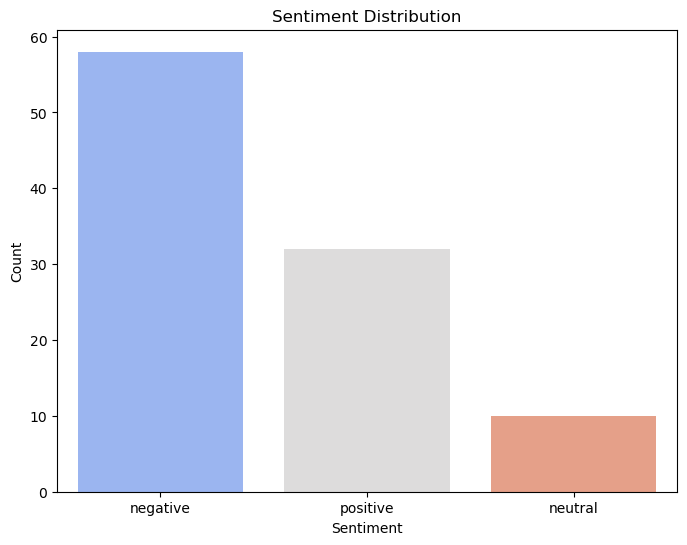

In [39]:
plt.figure(figsize = (8, 6))
sn.barplot(x = sentiment_counts.index, y = sentiment_counts.values, palette = 'coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [41]:
positive_comments = comment[comment['sentiment_label'] == 'positive']['Comment'].str.cat(sep='')
negative_comments = comment[comment['sentiment_label'] == 'negative']['Comment'].str.cat(sep='')

In [42]:
wc_positive = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_comments)
wc_negative = WordCloud(width = 800, height = 400, background_color = 'black').generate(negative_comments)

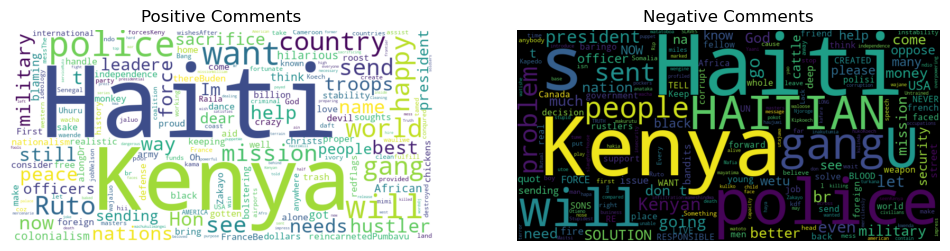

In [43]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation = 'bilinear')
plt.title('Positive Comments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation = 'bilinear')
plt.title('Negative Comments')
plt.axis('off')

plt.show()

In [45]:
comment.to_csv("C:\\Users\Ade\Downloads\Data Science material\comments.csv", index=False)